<a href="https://colab.research.google.com/github/kazuekudo1222/telecom-churn-prediction/blob/main/Telecom_churn_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom

## Overview of the data

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import missingno as msno
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency

In [ ]:
# Connect colab with G-drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Change the work directory
os.chdir("/content/drive/MyDrive/Le Wagon/project/original") ## Put your work directry!
os.getcwd()

'/content/drive/MyDrive/Le Wagon/project/original'

In [ ]:
# Import updated version - cluste
df = pd.read_csv("telcom_clearn_cluster.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   int64_field_0                      7043 non-null   int64  
 1   customer_id                        7043 non-null   object 
 2   gender                             7043 non-null   object 
 3   age                                7043 non-null   int64  
 4   married                            7043 non-null   bool   
 5   number_of_dependents               7043 non-null   int64  
 6   city                               7043 non-null   object 
 7   zip_code                           7043 non-null   int64  
 8   latitude                           7043 non-null   float64
 9   longitude                          7043 non-null   float64
 10  number_of_referrals                7043 non-null   int64  
 11  tenure_in_months                   7043 non-null   int64

In [ ]:
# df = pd.read_csv("telecom_clean.csv")
# df.info()

In [ ]:
# Get the latet dataset
# df = pd.read_csv("telecom_clean_updated3.csv")
# df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,customer_status,churn_category,churn_reason,population,is_churn,sum_of_all_services,sum_of_additional_services,contract_month,contract_one_y,contract_two_y
0,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,Stayed,no_churn,no_churn,4498,0,6,4,0,1,0
1,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,Stayed,no_churn,no_churn,31297,0,4,2,1,0,0
2,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Churned,Competitor,Competitor had better devices,62069,1,4,2,1,0,0
3,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,Churned,Dissatisfaction,Product dissatisfaction,46677,1,7,5,1,0,0
4,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,Churned,Dissatisfaction,Network reliability,42853,1,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,0,0,La Mesa,91941,32.759327,-116.997260,0,...,Stayed,no_churn,no_churn,44652,0,6,4,0,1,0
7039,9992-RRAMN,Male,40,1,0,Riverbank,95367,37.734971,-120.954271,1,...,Churned,Dissatisfaction,Product dissatisfaction,16525,1,5,3,1,0,0
7040,9992-UJOEL,Male,22,0,0,Elk,95432,39.108252,-123.645121,0,...,Joined,no_churn,no_churn,383,0,4,2,1,0,0
7041,9993-LHIEB,Male,21,1,0,Solana Beach,92075,33.001813,-117.263628,5,...,Stayed,no_churn,no_churn,12173,0,8,6,0,0,1


In [ ]:
## import the latest file
# df = pd.read_csv("telecom_clean_updated3.csv")
# df.info()

In [ ]:
df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,population,is_churn,sum_of_additional_services,sum_of_all_services
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,0,381.51,974.81,Stayed,no_churn,no_churn,4498,0,4,6
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,10,96.21,610.28,Stayed,no_churn,no_churn,31297,0,2,4
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069,1,2,4
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677,1,5,7
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853,1,3,5


## Create new variable

In [ ]:
# Create categorical variable
non_numeric_col = df.select_dtypes(exclude = "number").columns
non_numeric_col

Index(['customer_id', 'gender', 'married', 'city', 'offer', 'phone_service',
       'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'customer_status', 'churn_category', 'churn_reason',
       'clusters', 'services'],
      dtype='object')

In [ ]:
df[non_numeric_col].head()

,customer_id,gender,married,city,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_category,churn_reason,clusters,services
0,5804-JMYIO,Female,True,Glencoe,Offer C,True,False,False,No,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
1,3764-MNMOI,Male,False,Boulevard,Offer B,True,False,False,No,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
2,5854-KSRBJ,Male,True,San Clemente,Offer A,True,True,False,No,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
3,0902-XKXPN,Male,True,Redding,None,True,False,False,No,False,...,False,False,Two Year,False,Bank Withdrawal,Stayed,no_churn,no_churn,Low risk,phone service
4,4950-HKQTE,Female,False,Morro Bay,Offer D,True,True,False,No,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service


In [ ]:
df[non_numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             7043 non-null   object
 1   gender                  7043 non-null   object
 2   married                 7043 non-null   bool  
 3   city                    7043 non-null   object
 4   offer                   7043 non-null   object
 5   phone_service           7043 non-null   bool  
 6   multiple_lines          7043 non-null   bool  
 7   internet_service        7043 non-null   bool  
 8   internet_type           7043 non-null   object
 9   online_security         7043 non-null   bool  
 10  online_backup           7043 non-null   bool  
 11  device_protection_plan  7043 non-null   bool  
 12  premium_tech_support    7043 non-null   bool  
 13  streaming_tv            7043 non-null   bool  
 14  streaming_movies        7043 non-null   bool  
 15  stre

In [ ]:
# Change the categorical variable (Yes, No) to 0 and 1
# df[non_numeric_col] = df[non_numeric_col].replace({'Yes': 1, 'No': 0})
# df[non_numeric_col].head()

,customer_id,gender,married,city,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_category,churn_reason,clusters,services
0,5804-JMYIO,Female,True,Glencoe,Offer C,True,False,False,0,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
1,3764-MNMOI,Male,False,Boulevard,Offer B,True,False,False,0,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
2,5854-KSRBJ,Male,True,San Clemente,Offer A,True,True,False,0,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
3,0902-XKXPN,Male,True,Redding,None,True,False,False,0,False,...,False,False,Two Year,False,Bank Withdrawal,Stayed,no_churn,no_churn,Low risk,phone service
4,4950-HKQTE,Female,False,Morro Bay,Offer D,True,True,False,0,False,...,False,False,Two Year,False,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service


In [ ]:
# Change the categorical variable (True, False) to 0 and 1 for the cluster
df[non_numeric_col] = df[non_numeric_col].replace({True: 1, False: 0})
df[non_numeric_col].head()

,customer_id,gender,married,city,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_category,churn_reason,clusters,services
0,5804-JMYIO,Female,1,Glencoe,Offer C,1,0,0,No,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
1,3764-MNMOI,Male,0,Boulevard,Offer B,1,0,0,No,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
2,5854-KSRBJ,Male,1,San Clemente,Offer A,1,1,0,No,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
3,0902-XKXPN,Male,1,Redding,None,1,0,0,No,0,...,0,0,Two Year,0,Bank Withdrawal,Stayed,no_churn,no_churn,Low risk,phone service
4,4950-HKQTE,Female,0,Morro Bay,Offer D,1,1,0,No,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service


In [ ]:
# Change the categorical gendar variable to 0 and 1 for the cluster
df["gender"] = df["gender"].replace({"Female": 1, "Male": 0})
df["gender"].head()

0    1
1    0
2    0
3    0
4    1
Name: gender, dtype: int64

In [ ]:
df[non_numeric_col]

,customer_id,gender,married,city,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_category,churn_reason,clusters,services
0,5804-JMYIO,1,1,Glencoe,Offer C,1,0,0,0,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
1,3764-MNMOI,0,0,Boulevard,Offer B,1,0,0,0,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
2,5854-KSRBJ,0,1,San Clemente,Offer A,1,1,0,0,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
3,0902-XKXPN,0,1,Redding,None,1,0,0,0,0,...,0,0,Two Year,0,Bank Withdrawal,Stayed,no_churn,no_churn,Low risk,phone service
4,4950-HKQTE,1,0,Morro Bay,Offer D,1,1,0,0,0,...,0,0,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Low risk,phone service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6681-ZSEXG,0,1,Rancho Cordova,Offer B,1,1,1,DSL,0,...,0,1,Two Year,0,Credit Card,Stayed,no_churn,no_churn,Medium risk,both services
7039,1091-SOZGA,1,1,La Palma,None,1,1,1,Fiber Optic,0,...,1,1,One Year,1,Credit Card,Stayed,no_churn,no_churn,Medium risk,both services
7040,2380-DAMQP,1,1,La Palma,None,1,1,1,Fiber Optic,1,...,1,1,Two Year,0,Bank Withdrawal,Stayed,no_churn,no_churn,Medium risk,both services
7041,5334-JLAXU,1,1,French Camp,Offer B,1,1,1,Fiber Optic,1,...,1,1,Month-to-Month,1,Credit Card,Stayed,no_churn,no_churn,Medium risk,both services


In [ ]:
# Create the variable for Churn vs non-churn
df["is_churn"] = np.where(df['customer_status'].isin(['Stayed', 'Joined']), 0, 1)
df.head()

,int64_field_0,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,...,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,population,clusters,services,is_churn
0,4106,5804-JMYIO,1,40,1,3,Glencoe,95232,38.358464,-120.579304,...,0,620.49,1378.44,Stayed,no_churn,no_churn,21,Low risk,phone service,0
1,2649,3764-MNMOI,0,49,0,0,Boulevard,91905,32.677097,-116.304991,...,0,1425.54,2333.69,Stayed,no_churn,no_churn,1509,Low risk,phone service,0
2,4141,5854-KSRBJ,0,31,1,1,San Clemente,92673,33.472500,-117.584273,...,0,653.10,2435.15,Stayed,no_churn,no_churn,15297,Low risk,phone service,0
3,617,0902-XKXPN,0,29,1,1,Redding,96001,40.587919,-122.464732,...,0,1624.95,3001.45,Stayed,no_churn,no_churn,31586,Low risk,phone service,0
4,3495,4950-HKQTE,1,47,0,0,Morro Bay,93442,35.369553,-120.763864,...,0,116.16,722.06,Stayed,no_churn,no_churn,10909,Low risk,phone service,0


In [ ]:
# Create the number of all serivces (including phone, internet, and additional)
all_services = ['phone_service', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data']

df['sum_of_all_services'] = df.loc[:,all_services].sum(axis=1)
df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,population,is_churn,sum_of_all_services
0,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,0.00,0,381.51,974.81,Stayed,no_churn,no_churn,4498,0,6
1,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,38.33,10,96.21,610.28,Stayed,no_churn,no_churn,31297,0,4
2,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069,1,4
3,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677,1,7
4,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,0,0,La Mesa,91941,32.759327,-116.997260,0,...,0.00,0,606.84,1349.74,Stayed,no_churn,no_churn,44652,0,6
7039,9992-RRAMN,Male,40,1,0,Riverbank,95367,37.734971,-120.954271,1,...,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,16525,1,5
7040,9992-UJOEL,Male,22,0,0,Elk,95432,39.108252,-123.645121,0,...,0.00,0,37.24,129.99,Joined,no_churn,no_churn,383,0,4
7041,9993-LHIEB,Male,21,1,0,Solana Beach,92075,33.001813,-117.263628,5,...,0.00,0,142.04,4769.69,Stayed,no_churn,no_churn,12173,0,8


In [ ]:
# Create the number of serivces (additional services)
additional_services = ['online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data']

df['sum_of_additional_services'] = df.loc[:,additional_services].sum(axis=1)
df

,int64_field_0,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,...,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,population,clusters,services,is_churn,sum_of_additional_services
0,4106,5804-JMYIO,1,40,1,3,Glencoe,95232,38.358464,-120.579304,...,620.49,1378.44,Stayed,no_churn,no_churn,21,Low risk,phone service,0,0
1,2649,3764-MNMOI,0,49,0,0,Boulevard,91905,32.677097,-116.304991,...,1425.54,2333.69,Stayed,no_churn,no_churn,1509,Low risk,phone service,0,0
2,4141,5854-KSRBJ,0,31,1,1,San Clemente,92673,33.472500,-117.584273,...,653.10,2435.15,Stayed,no_churn,no_churn,15297,Low risk,phone service,0,0
3,617,0902-XKXPN,0,29,1,1,Redding,96001,40.587919,-122.464732,...,1624.95,3001.45,Stayed,no_churn,no_churn,31586,Low risk,phone service,0,0
4,3495,4950-HKQTE,1,47,0,0,Morro Bay,93442,35.369553,-120.763864,...,116.16,722.06,Stayed,no_churn,no_churn,10909,Low risk,phone service,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4740,6681-ZSEXG,0,34,1,0,Rancho Cordova,95742,38.591134,-121.161585,...,1990.80,5380.05,Stayed,no_churn,no_churn,299,Medium risk,both services,0,3
7039,745,1091-SOZGA,1,27,1,0,La Palma,90623,33.850504,-118.039892,...,2372.72,7888.17,Stayed,no_churn,no_churn,15505,Medium risk,both services,0,5
7040,1639,2380-DAMQP,1,63,1,0,La Palma,90623,33.850504,-118.039892,...,2922.48,11272.18,Stayed,no_churn,no_churn,15505,Medium risk,both services,0,8
7041,3793,5334-JLAXU,1,44,1,0,French Camp,95231,37.873283,-121.292034,...,932.40,6408.30,Stayed,no_churn,no_churn,5094,Medium risk,both services,0,5


In [ ]:
# Encode the contract variable
df[["contract_month", "contract_one_y", "contract_two_y"]] = pd.get_dummies(df['contract'])
df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,customer_status,churn_category,churn_reason,population,is_churn,sum_of_all_services,sum_of_additional_services,contract_month,contract_one_y,contract_two_y
0,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,Stayed,no_churn,no_churn,4498,0,6,4,0,1,0
1,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,Stayed,no_churn,no_churn,31297,0,4,2,1,0,0
2,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Churned,Competitor,Competitor had better devices,62069,1,4,2,1,0,0
3,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,Churned,Dissatisfaction,Product dissatisfaction,46677,1,7,5,1,0,0
4,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,Churned,Dissatisfaction,Network reliability,42853,1,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,0,0,La Mesa,91941,32.759327,-116.997260,0,...,Stayed,no_churn,no_churn,44652,0,6,4,0,1,0
7039,9992-RRAMN,Male,40,1,0,Riverbank,95367,37.734971,-120.954271,1,...,Churned,Dissatisfaction,Product dissatisfaction,16525,1,5,3,1,0,0
7040,9992-UJOEL,Male,22,0,0,Elk,95432,39.108252,-123.645121,0,...,Joined,no_churn,no_churn,383,0,4,2,1,0,0
7041,9993-LHIEB,Male,21,1,0,Solana Beach,92075,33.001813,-117.263628,5,...,Stayed,no_churn,no_churn,12173,0,8,6,0,0,1


In [ ]:
#df

,int64_field_0,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,...,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,population,clusters,services,is_churn,sum_of_additional_services
0,4106,5804-JMYIO,1,40,1,3,Glencoe,95232,38.358464,-120.579304,...,620.49,1378.44,Stayed,no_churn,no_churn,21,Low risk,phone service,0,0
1,2649,3764-MNMOI,0,49,0,0,Boulevard,91905,32.677097,-116.304991,...,1425.54,2333.69,Stayed,no_churn,no_churn,1509,Low risk,phone service,0,0
2,4141,5854-KSRBJ,0,31,1,1,San Clemente,92673,33.472500,-117.584273,...,653.10,2435.15,Stayed,no_churn,no_churn,15297,Low risk,phone service,0,0
3,617,0902-XKXPN,0,29,1,1,Redding,96001,40.587919,-122.464732,...,1624.95,3001.45,Stayed,no_churn,no_churn,31586,Low risk,phone service,0,0
4,3495,4950-HKQTE,1,47,0,0,Morro Bay,93442,35.369553,-120.763864,...,116.16,722.06,Stayed,no_churn,no_churn,10909,Low risk,phone service,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4740,6681-ZSEXG,0,34,1,0,Rancho Cordova,95742,38.591134,-121.161585,...,1990.80,5380.05,Stayed,no_churn,no_churn,299,Medium risk,both services,0,3
7039,745,1091-SOZGA,1,27,1,0,La Palma,90623,33.850504,-118.039892,...,2372.72,7888.17,Stayed,no_churn,no_churn,15505,Medium risk,both services,0,5
7040,1639,2380-DAMQP,1,63,1,0,La Palma,90623,33.850504,-118.039892,...,2922.48,11272.18,Stayed,no_churn,no_churn,15505,Medium risk,both services,0,8
7041,3793,5334-JLAXU,1,44,1,0,French Camp,95231,37.873283,-121.292034,...,932.40,6408.30,Stayed,no_churn,no_churn,5094,Medium risk,both services,0,5


In [ ]:
# Get the csv file
#df.to_csv("telecom_clean_updated3.csv", index = False)

## Statictics Analysis & Feature Engineering for ML

In [ ]:
# Get only the numeric variables
df_numeric = df.select_dtypes(include = "number")
df_numeric.info()

# Drop unnecessary columns
df_numeric = df_numeric.drop(columns = ["zip_code", "latitude", "longitude"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   int64_field_0                      7043 non-null   int64  
 1   gender                             7043 non-null   int64  
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   int64  
 4   number_of_dependents               7043 non-null   int64  
 5   zip_code                           7043 non-null   int64  
 6   latitude                           7043 non-null   float64
 7   longitude                          7043 non-null   float64
 8   number_of_referrals                7043 non-null   int64  
 9   tenure_in_months                   7043 non-null   int64  
 10  phone_service                      7043 non-null   int64  
 11  avg_monthly_long_distance_charges  7043 non-null   float

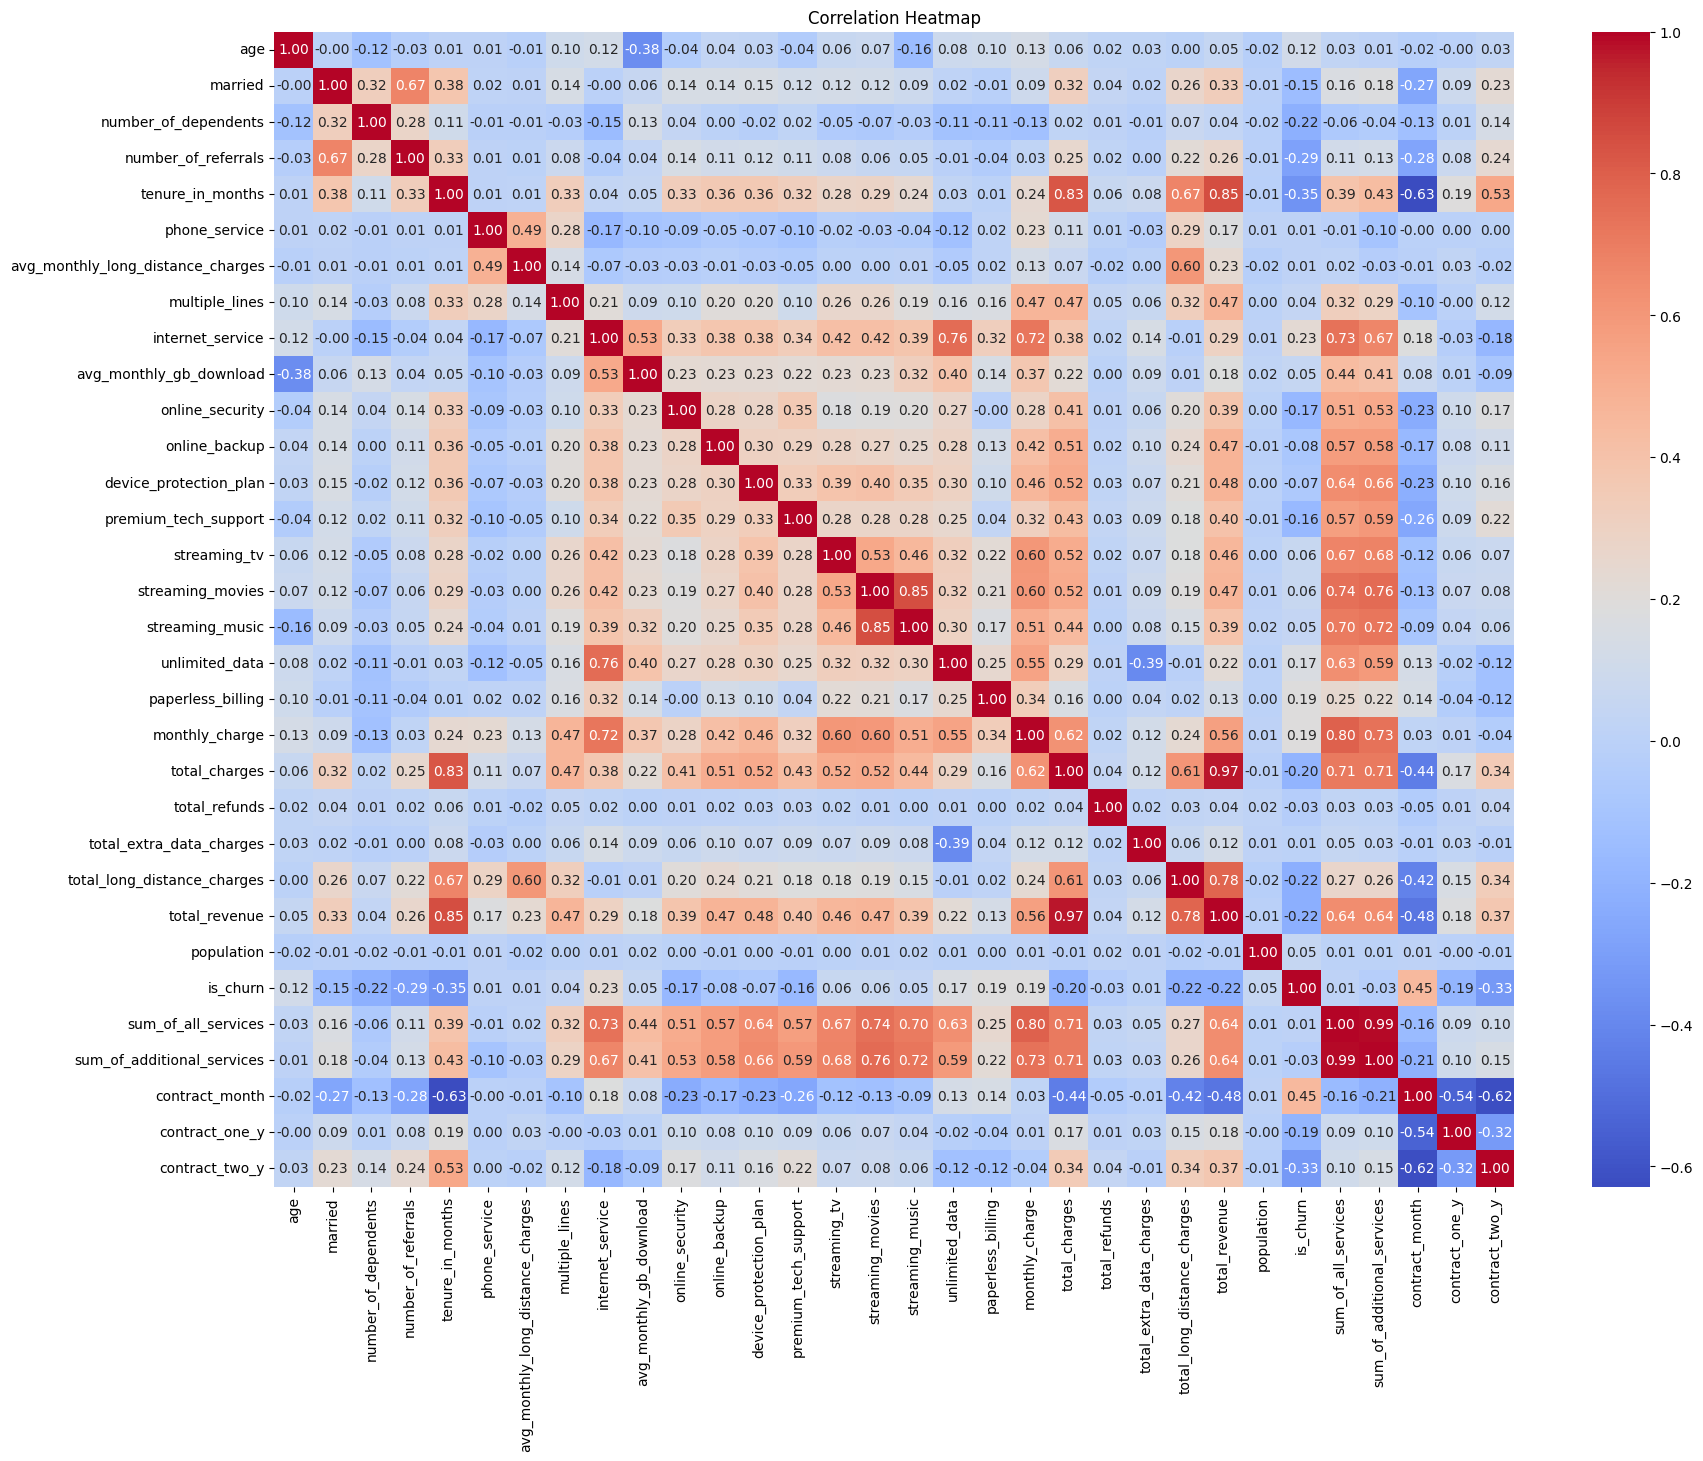

In [ ]:
# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 15))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Set annot=True to display correlation values on the heatmap
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()

In [ ]:
# Sort the order of the absolute value from correlation matrix

corr_matrix_sorted = corr_matrix["is_churn"].abs().sort_values(ascending = False)
corr_matrix_sorted

is_churn                             1.000000
contract_month                       0.448427
tenure_in_months                     0.352861
contract_two_y                       0.328195
number_of_referrals                  0.286540
internet_service                     0.227890
total_long_distance_charges          0.223756
total_revenue                        0.223003
number_of_dependents                 0.218780
total_charges                        0.198546
paperless_billing                    0.191825
contract_one_y                       0.190418
monthly_charge                       0.187833
online_security                      0.171226
unlimited_data                       0.166545
premium_tech_support                 0.164674
married                              0.150448
age                                  0.115760
online_backup                        0.082255
device_protection_plan               0.066160
streaming_tv                         0.063228
streaming_movies                  

In [ ]:
## Top variable. decided to put the foloowing top variables (13 variables)
# contract_month                       0.448427
# tenure_in_months                     0.352861
# contract_two_y                       0.328195
# number_of_referrals                  0.286540
# internet_service                     0.227890
# total_long_distance_charges          0.223756
# total_revenue                        0.223003
# number_of_dependents                 0.218780
# paperless_billing                    0.191825
# monthly_charge                       0.187833
# online_security                      0.171226
# unlimited_data                       0.166545
# premium_tech_support                 0.164674


### will not be included:

# total_charges                        0.198546 # highly realted to total_revenue
# contract_one_y                       0.190418 # highly realted to other contract types
# sum_of_additional_services           0.025702 # our hypothesis but low correlation
# sum_of_all_services                  0.013102 # our hypothesis but low correlation

In [ ]:
# Select only the columns above
col = ["contract_month", "tenure_in_months", "contract_two_y", "number_of_referrals",
"internet_service", "total_long_distance_charges", "total_revenue", "number_of_dependents", "paperless_billing", "monthly_charge",
"online_security", "unlimited_data", "premium_tech_support"]

df[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   contract_month               7043 non-null   uint8  
 1   tenure_in_months             7043 non-null   int64  
 2   contract_two_y               7043 non-null   uint8  
 3   number_of_referrals          7043 non-null   int64  
 4   internet_service             7043 non-null   int64  
 5   total_long_distance_charges  7043 non-null   float64
 6   total_revenue                7043 non-null   float64
 7   number_of_dependents         7043 non-null   int64  
 8   paperless_billing            7043 non-null   int64  
 9   monthly_charge               7043 non-null   float64
 10  online_security              7043 non-null   int64  
 11  unlimited_data               7043 non-null   int64  
 12  premium_tech_support         7043 non-null   int64  
dtypes: float64(3), int

In [ ]:
# X = df[""]
# y = df["is_churn"]
# logreg = LogisticRegression()

In [ ]:
# from sklearn.linear_model import LogisticRegression

# X = df[""]
# y = df["is_churn"]
# logreg = LogisticRegression()
# cv_results = cross_validate(logreg, X, y, cv=10)



# clf = LogisticRegression(random_state=0).fit(X, y)
# clf.predict(X[:2, :])

# clf.predict_proba(X[:2, :])

# clf.score(X, y)

In [ ]:
# I need to check if this is work!!!!
feature_list = df[col]

In [ ]:
# Create a list to store the names of the top correlated and our hypothesis features
score_list = []

for I in range(1,len(feature_list)+1):
  X = df[feature_list[:I]]
  y = df["is_churn"]
  logreg = LogisticRegression()
  cv_results = cross_validate(logreg, X, y, cv=10)

  # Scores
  score_list.append(cv_results['test_score'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.7391755319148936, 0.7495402159896841, 0.7738168923275307, 0.7770837362991618, 0.7810577852998066, 0.7850342520954222, 0.7941201241134752, 0.7932696647324308, 0.7982406511927789, 0.8125826079948422, 0.8066146840747905, 0.7989494680851064, 0.8015036669890394]


In [ ]:
# Check the score of the model
score_list #including top 10 variable are the best model fit

# The variables to be included in the ML
# 0   contract_month               7043 non-null   uint8
#  1   tenure_in_months             7043 non-null   int64
#  2   contract_two_y               7043 non-null   uint8
#  3   number_of_referrals          7043 non-null   int64
#  4   internet_service             7043 non-null   int64
#  5   total_long_distance_charges  7043 non-null   float64
#  6   total_revenue                7043 non-null   float64
#  7   number_of_dependents         7043 non-null   int64
#  8   paperless_billing            7043 non-null   int64
#  9   monthly_charge               7043 non-null   float64

[0.7391755319148936,
 0.7495402159896841,
 0.7738168923275307,
 0.7770837362991618,
 0.7810577852998066,
 0.7850342520954222,
 0.7941201241134752,
 0.7932696647324308,
 0.7982406511927789,
 0.8125826079948422,
 0.8066146840747905,
 0.7989494680851064,
 0.8015036669890394]

In [ ]:
# Get the dataframe for ML (featuer and target variables)
df_ml = df[["contract_month", "tenure_in_months", "contract_two_y", "number_of_referrals",
"internet_service", "total_long_distance_charges", "total_revenue", "number_of_dependents", "paperless_billing", "monthly_charge", "is_churn"]]
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   contract_month               7043 non-null   uint8  
 1   tenure_in_months             7043 non-null   int64  
 2   contract_two_y               7043 non-null   uint8  
 3   number_of_referrals          7043 non-null   int64  
 4   internet_service             7043 non-null   int64  
 5   total_long_distance_charges  7043 non-null   float64
 6   total_revenue                7043 non-null   float64
 7   number_of_dependents         7043 non-null   int64  
 8   paperless_billing            7043 non-null   int64  
 9   monthly_charge               7043 non-null   float64
 10  is_churn                     7043 non-null   int64  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 509.1 KB


## Visualisation: Statistical Teseting


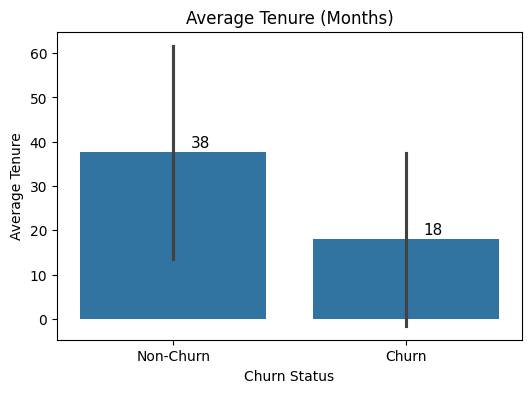

In [ ]:
## Get bar plto for z-test (tenure vs churn)
plt.figure(figsize = (6, 4))
ax = sns.barplot(x = 'is_churn', y = 'tenure_in_months', data = df, estimator = np.mean, errorbar = 'sd')
plt.title('Average Tenure (Months)')
plt.xlabel('Churn Status')
plt.ylabel('Average Tenure')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])

# Adding value labels
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(20, 7),  # Adjust xytext here
                textcoords='offset points')

plt.show()

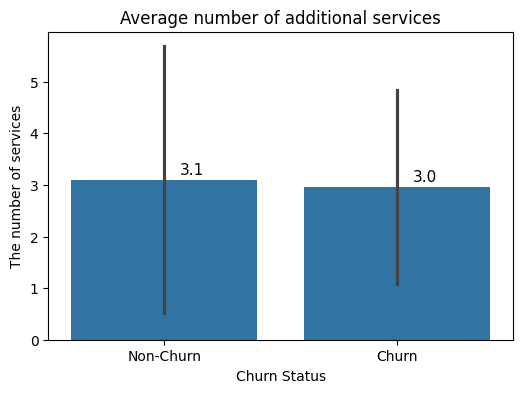

In [ ]:
##### Get bar plot for z-test (the number of services vs churn)
### Additional services
plt.figure(figsize = (6, 4))
ax = sns.barplot(x = 'is_churn', y = 'sum_of_additional_services', data = df, estimator = np.mean, errorbar = 'sd')
plt.title('Average number of additional services')
plt.xlabel('Churn Status')
plt.ylabel('The number of services')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])

# Adding value labels
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(20, 7),  # Adjust xytext here
                textcoords='offset points')

plt.show()

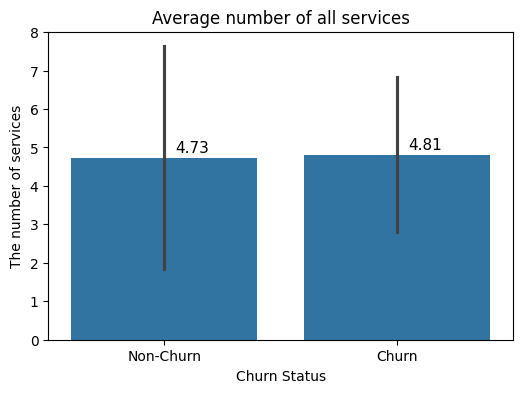

In [ ]:
### all services
plt.figure(figsize = (6, 4))
ax = sns.barplot(x = 'is_churn', y = 'sum_of_all_services', data = df, estimator = np.mean, errorbar = 'sd')
plt.title('Average number of all services')
plt.xlabel('Churn Status')
plt.ylabel('The number of services')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])

# Adding value labels
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(20, 7),  # Adjust xytext here
                textcoords='offset points')

plt.show()

In [ ]:
# Crosstabulation
cross_tab = pd.crosstab(df['is_churn'], df['contract'])
cross_tab

contract,Month-to-Month,One Year,Two Year
is_churn,,,
0,1955,1384,1835
1,1655,166,48


In [ ]:
# Chi square test
contingency_table = pd.crosstab(df['contract'], df['is_churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p}")

plt.show()

Chi-squared statistic: 1445.2932428377585
Degrees of freedom: 2
p-value: 0.0


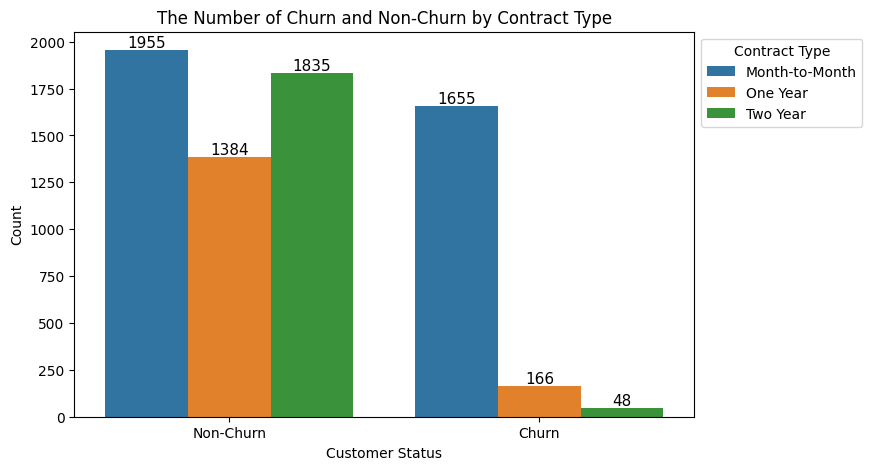

In [ ]:
# Get the qui squared test (contract type vs churn)
# Plotting
plt.figure(figsize=(8, 5))
ax = sns.countplot(data = df, x = 'is_churn', hue = 'contract', hue_order = ["Month-to-Month", "One Year", "Two Year"])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('The Number of Churn and Non-Churn by Contract Type')
plt.xticks([0, 1], ['Non-Churn', 'Churn'])

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Contract Type', bbox_to_anchor=(1, 1), loc='upper left')

# Adding value labels
for p in ax.patches:
    if p.get_height() != 0:  # Check if the height is not zero
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

In [ ]:
# Create the only needed collumns for the correlation matrix
#df_cor = df[["sum_of_all_services", "sum_of_additional_services", "is_churn"]]
df_cor = df[["sum_of_additional_services", "is_churn"]]
df_cor

,sum_of_additional_services,is_churn
0,4,0
1,2,0
2,2,1
3,5,1
4,3,1
...,...,...
7038,4,0
7039,3,1
7040,2,0
7041,6,0


In [ ]:
# Check the correlation between additional service and churn

# Assume x and y are your two variables
x = df['sum_of_additional_services']
y = df['is_churn']

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(x, y)
print("corr_coef", corr_coef,"p-value: ", p_value)

-0.02570239942434119 p-value:  0.031006817278817825


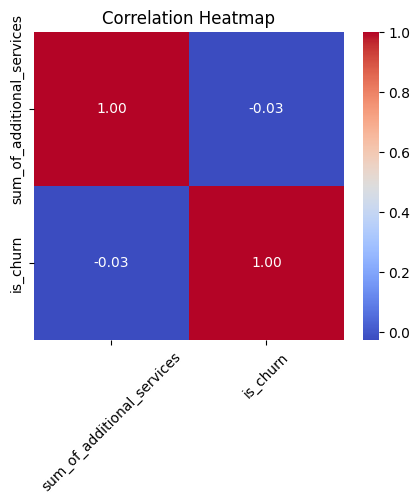

In [ ]:
# Correlation plot
#sum_of_additional_services vs chrun
corr_matrix_2 = df_cor.corr()

# Plot correlation heatmap
plt.figure(figsize=(5, 4))  # Set the figure size
heatmap = sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")  # Set annot=True to display correlation values on the heatmap
plt.title('Correlation Heatmap')  # Set the title of the heatmap

# Rotate x-axis labels to 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

plt.show()

In [ ]:
df.shape

(7043, 45)

## ML: Classification

In [ ]:
# Check the size of churn variable
df_ml["is_churn"].value_counts()

0    5174
1    1869
Name: is_churn, dtype: int64

In [ ]:
# Take 1500 sample for churn and non-churn for the balanced data
df_ml_sample = pd.concat([df_ml[df_ml["is_churn"] == 0].sample(1500),
                  df_ml[df_ml["is_churn"] == 1].sample(1500)])
df_ml_sample

,contract_month,tenure_in_months,contract_two_y,number_of_referrals,internet_service,total_long_distance_charges,total_revenue,number_of_dependents,paperless_billing,monthly_charge,is_churn
1022,1,7,0,0,1,242.13,732.68,0,1,74.90,0
2664,1,1,0,0,0,16.91,36.56,0,0,19.65,0
6728,1,30,0,6,1,374.70,1963.40,2,1,54.45,0
6395,0,65,0,2,1,2490.80,8616.95,0,0,94.40,0
5915,0,23,0,0,1,0.00,947.40,1,0,40.65,0
...,...,...,...,...,...,...,...,...,...,...,...
3202,1,6,0,1,1,164.64,709.84,0,1,105.30,1
793,1,1,0,0,1,30.07,105.02,0,1,74.95,1
3588,1,18,0,1,1,0.00,669.85,0,1,39.05,1
6347,1,34,0,1,1,878.56,3596.86,0,1,79.60,1


In [ ]:
# Check the number of sample if all works good
df_ml_sample["is_churn"].value_counts() # Ok

0    1500
1    1500
Name: is_churn, dtype: int64

In [ ]:
# Create train and test data
train, test = train_test_split(df_ml_sample, test_size=0.2, stratify = df_ml_sample["is_churn"])

In [ ]:
# Create teh train and test datasets for X and y
X_train = train.drop(columns='is_churn')
X_test = test.drop(columns='is_churn')

y_train = train['is_churn']
y_test = test['is_churn']

### (Logistic regression => Just for practice)

In [ ]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
simple_log_model = LogisticRegression()

# Fit the model on the scaled training data
simple_log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the scaled testing data
y_pred = simple_log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7633333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       300
           1       0.76      0.77      0.76       300

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600

Confusion Matrix:
[[228  72]
 [ 70 230]]


### PyCaret

In [ ]:
# install pycaret

!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s e

In [ ]:
# Run second

!pip freeze | grep pycaret

pycaret==3.2.0


In [ ]:
# Set up pycaret
xp = setup(data = train,
           test_data = test,
           target = "is_churn",
           normalize = True,
           session_id = 42)

,Description,Value
0,Session id,42
1,Target,is_churn
2,Target type,Binary
3,Original data shape,"(3000, 11)"
4,Transformed data shape,"(3000, 11)"
5,Transformed train set shape,"(2400, 11)"
6,Transformed test set shape,"(600, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import plot_model
from pycaret.classification import tune_model

In [ ]:
# Compare the model
best_model = compare_models() #Gradient Boosting Classifier is the best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8079,0.8923,0.8392,0.7908,0.8137,0.6158,0.6180,0.2690
ada,Ada Boost Classifier,0.8071,0.8884,0.8408,0.7882,0.8132,0.6142,0.6164,0.1390
lightgbm,Light Gradient Boosting Machine,0.8017,0.8797,0.8267,0.7878,0.8063,0.6033,0.6049,0.7460
rf,Random Forest Classifier,0.8008,0.8746,0.8117,0.7949,0.8028,0.6017,0.6024,0.4190
xgboost,Extreme Gradient Boosting,0.7929,0.8697,0.8100,0.7840,0.7964,0.5858,0.5867,0.0940
lr,Logistic Regression,0.7892,0.8718,0.8283,0.7693,0.7971,0.5783,0.5812,0.6680
et,Extra Trees Classifier,0.7875,0.8668,0.7958,0.7837,0.7891,0.5750,0.5761,0.2570
qda,Quadratic Discriminant Analysis,0.7837,0.8659,0.8350,0.7582,0.7938,0.5675,0.5724,0.0330
svm,SVM - Linear Kernel,0.7788,0.0000,0.8350,0.7531,0.7901,0.5575,0.5639,0.1110
nb,Naive Bayes,0.7787,0.8618,0.8233,0.7578,0.7882,0.5575,0.5613,0.0650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

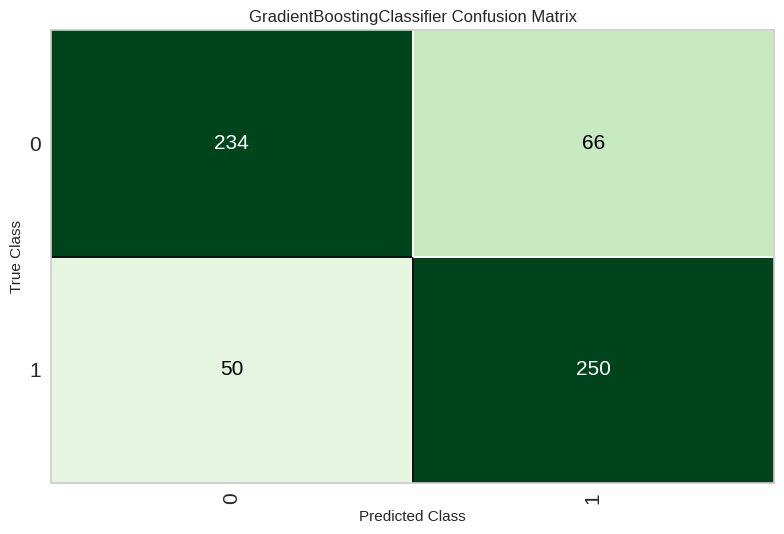

In [ ]:
# Get the matrix vonfusion for the best model

plot_model(best_model, plot='confusion_matrix')

In [ ]:
# Tune the model - need to check the document (https://pycaret.gitbook.io/docs/) as im not sure what im doing.

best_model_tuned = tune_model(best_model) # slighly better score.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8825,0.8833,0.7571,0.8154,0.6000,0.6085
1,0.8375,0.9151,0.8750,0.8140,0.8434,0.6750,0.6769
2,0.8125,0.8863,0.8417,0.7953,0.8178,0.6250,0.6261
3,0.8000,0.8883,0.8167,0.7903,0.8033,0.6000,0.6003
4,0.8250,0.9103,0.8500,0.8095,0.8293,0.6500,0.6508
5,0.8292,0.8992,0.8583,0.8110,0.8340,0.6583,0.6595
6,0.7875,0.8781,0.7917,0.7851,0.7884,0.5750,0.5750
7,0.8375,0.9107,0.8917,0.8045,0.8458,0.6750,0.6790
8,0.8083,0.8911,0.8250,0.7984,0.8115,0.6167,0.6170


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Check the parameters that was used for the model tuning ## I need to check this as well!
best_model_tuned.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 270,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.7,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

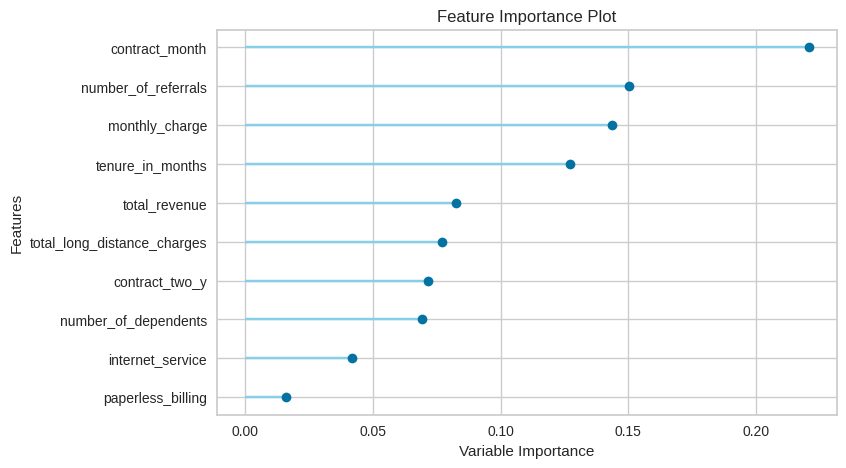

In [ ]:
# Check important features to predict the churn
plot_model(best_model_tuned,'feature')

In [ ]:
# Check the direction of the relationship once again

# Calculate correlation matrix
corr_matrix_2 = df_ml_sample.corr()
corr_matrix_2["is_churn"].sort_values(ascending = False)

### [POSITIVE] Higher the value of the following variables, customers are likely to churn
# is_churn                       1.000000
# contract_month                 0.524911
# internet_service               0.285075
# paperless_billing              0.222516
# monthly_charge                 0.211071

### [NEGATIVE] Higher the value of the following variables, customers are LESS likely to churn
# total_revenue                 -0.259448
# number_of_dependents          -0.260431
# total_long_distance_charges   -0.263743
# number_of_referrals           -0.355867
# tenure_in_months              -0.403604
# contract_two_y                -0.403734

is_churn                       1.000000
contract_month                 0.524911
internet_service               0.285075
paperless_billing              0.222516
monthly_charge                 0.211071
total_revenue                 -0.259448
number_of_dependents          -0.260431
total_long_distance_charges   -0.263743
number_of_referrals           -0.355867
tenure_in_months              -0.403604
contract_two_y                -0.403734
Name: is_churn, dtype: float64

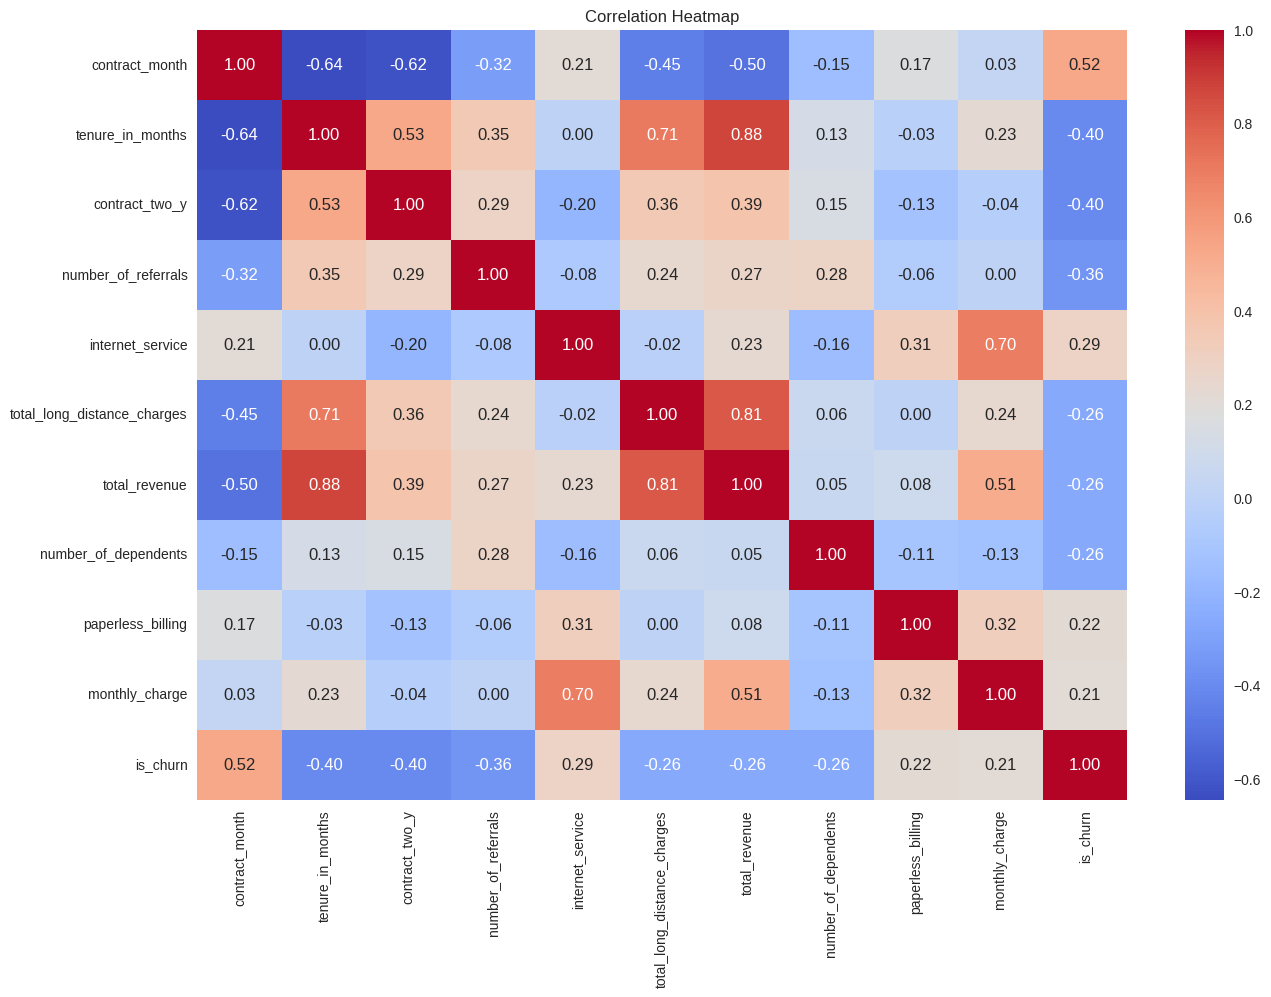

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")  # Set annot=True to display correlation values on the heatmap
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()